# Predict Health Outcomes of Horses

Playground Series - Season 3, Episode 22

https://www.kaggle.com/competitions/playground-series-s3e22

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [58]:
df_train = pd.read_csv('data/train.csv').drop(columns='id')
df_test = pd.read_csv('data/test.csv').drop(columns='id')
df_merge = pd.concat([df_train.drop(columns='outcome'), df_test])

df_train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


# Data analysis

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   hospital_number        1235 non-null   int64  
 3   rectal_temp            1235 non-null   float64
 4   pulse                  1235 non-null   float64
 5   respiratory_rate       1235 non-null   float64
 6   temp_of_extremities    1235 non-null   object 
 7   peripheral_pulse       1235 non-null   object 
 8   mucous_membrane        1235 non-null   object 
 9   capillary_refill_time  1235 non-null   object 
 10  pain                   1235 non-null   object 
 11  peristalsis            1235 non-null   object 
 12  abdominal_distention   1235 non-null   object 
 13  nasogastric_tube       1235 non-null   object 
 14  nasogastric_reflux     1235 non-null   object 
 15  naso

In [4]:
df_train.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [5]:
df_train['outcome'].value_counts(normalize=True)

lived         0.464777
died          0.331984
euthanized    0.203239
Name: outcome, dtype: float64

In [6]:
df_train.select_dtypes(include=['object'])

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,yes,no,died
1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,yes,no,euthanized
2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,None,distend_large,serosanguious,yes,no,lived
3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,yes,yes,lived
4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,no,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,None,distend_large,serosanguious,yes,no,lived
1231,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious,yes,yes,died
1232,yes,young,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy,yes,yes,lived
1233,yes,adult,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy,yes,no,lived


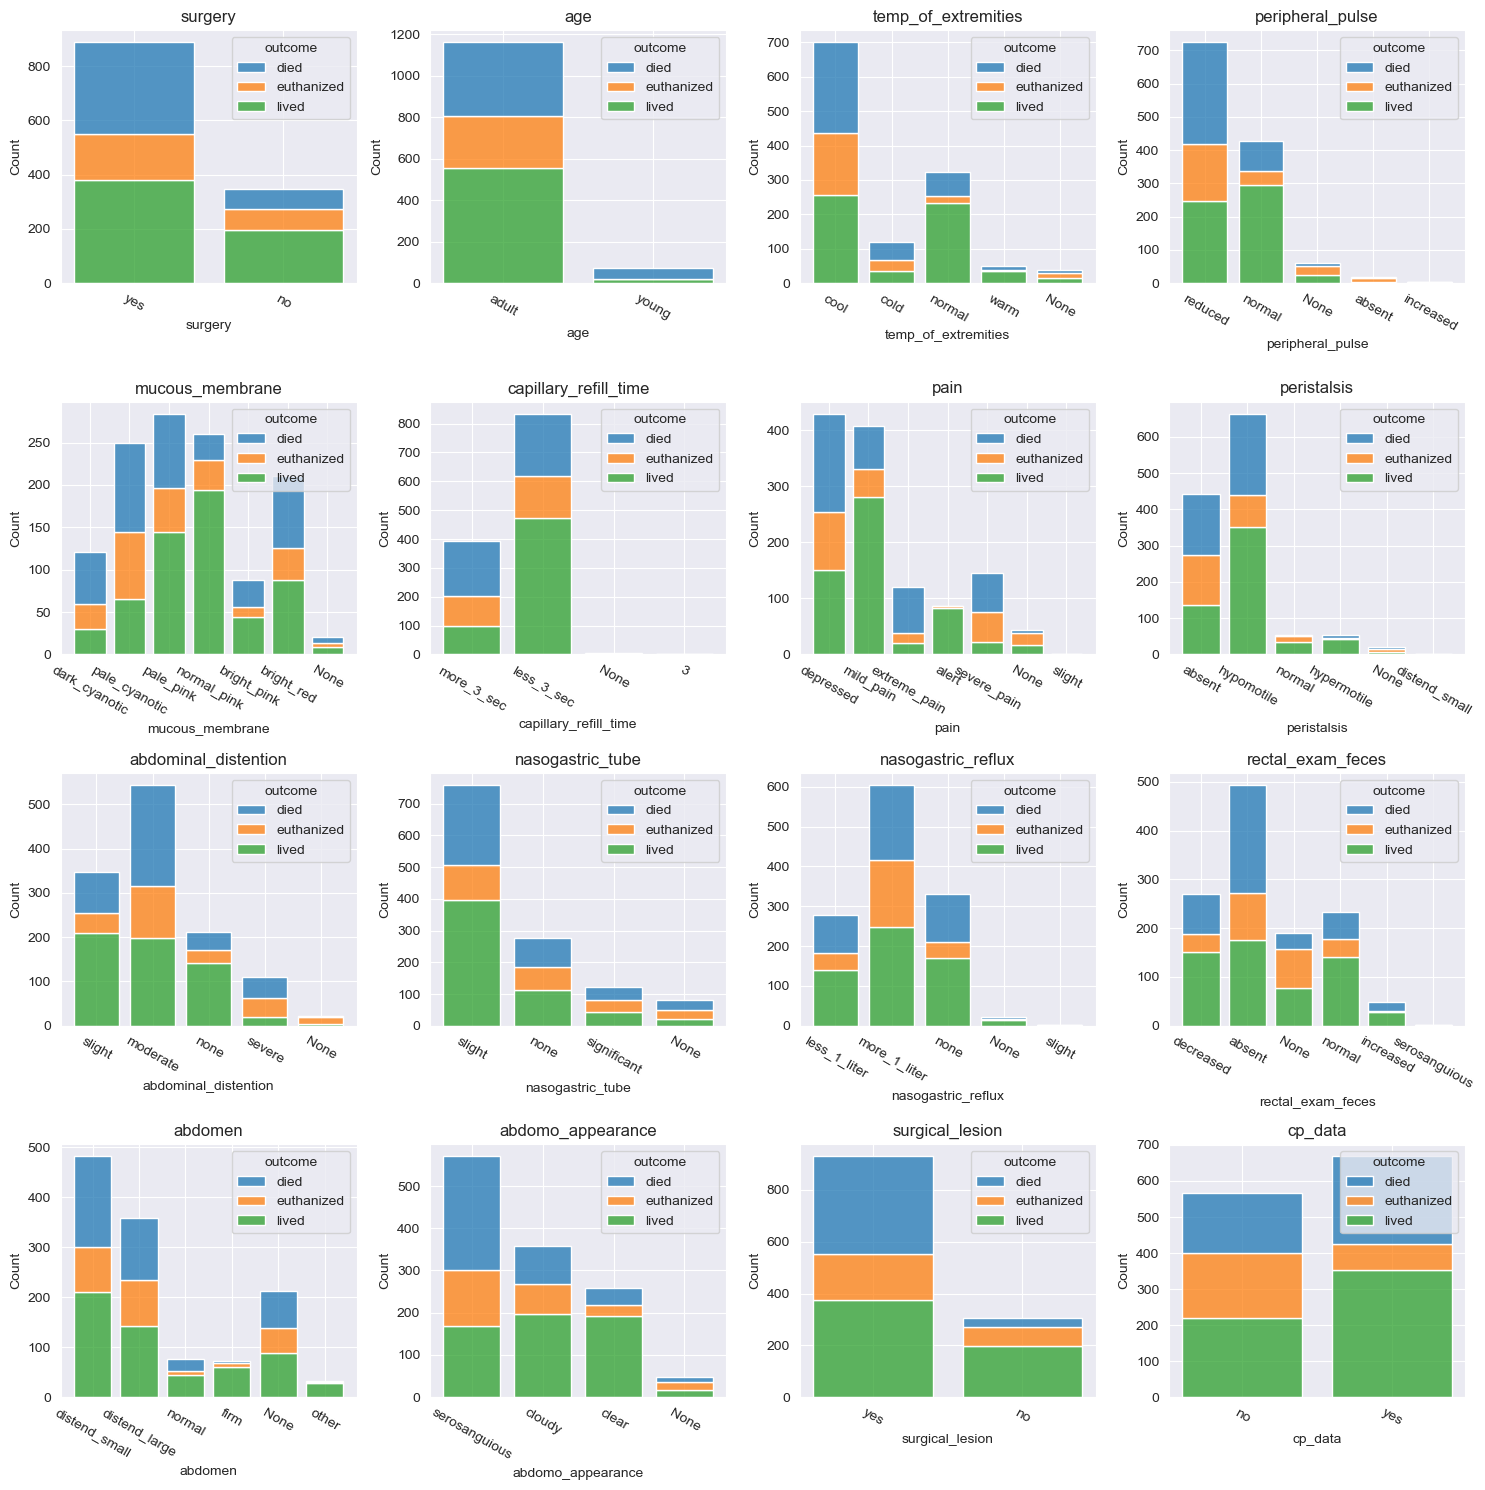

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

for i, col_name in enumerate(df_train.select_dtypes(include=['object']).drop(columns=['outcome']).columns):
    row_idx, col_idx = i // 4, i % 4
    sns.histplot(x=col_name, hue='outcome', data=df_train, multiple='stack', shrink=0.8, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col_name)
    axes[row_idx, col_idx].set_xticklabels(df_train[col_name].unique(), rotation=-30)

plt.tight_layout()
plt.show()

In [9]:
df_train.drop(columns=['hospital_number']).select_dtypes(exclude='object').describe()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


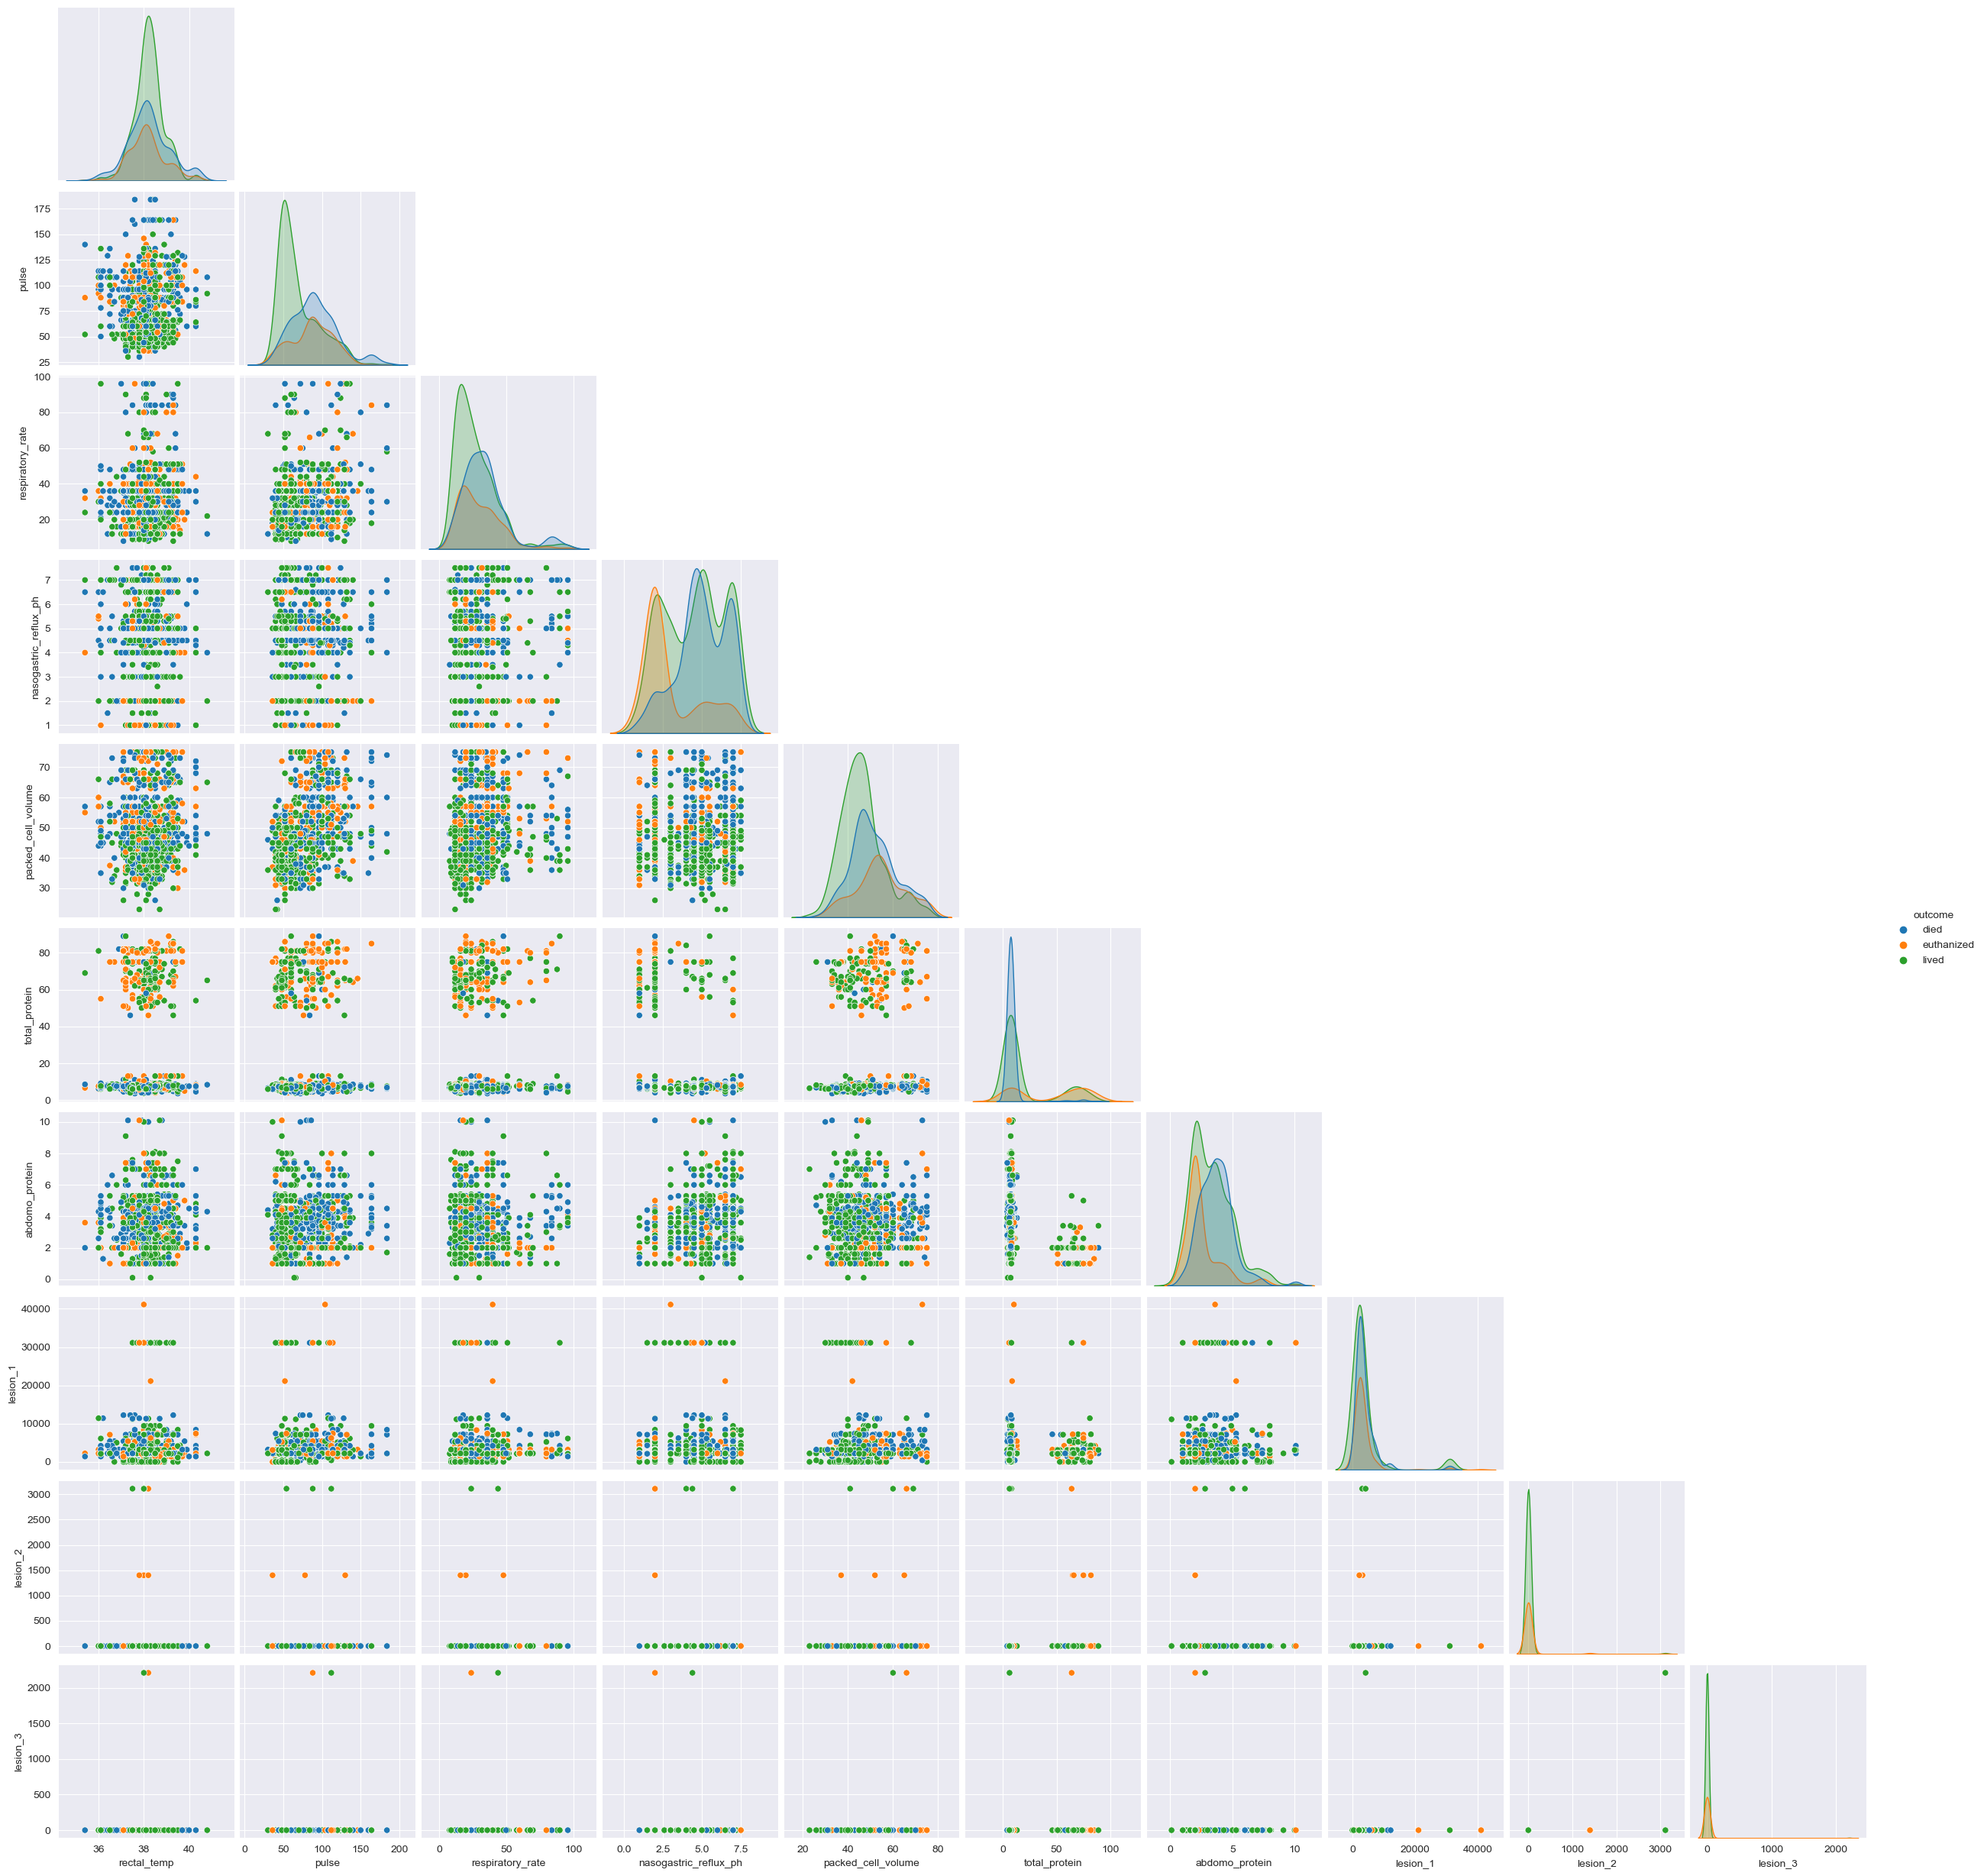

In [69]:
numerical_cols = df_train.drop(columns=['hospital_number']).select_dtypes(exclude='object').columns
sns.pairplot(data=df_train, x_vars=numerical_cols, y_vars=numerical_cols, hue='outcome', corner=True)

# Data preprocessing

In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

df_merge.drop(columns=['hospital_number'], inplace=True)
df_merge = pd.get_dummies(df_merge, drop_first=True)

X = df_merge[:df_train.shape[0]]
y = df_train['outcome']

assert(X.shape[0] == y.shape[0])

X_sub = df_merge[df_train.shape[0]:]

# le = LabelEncoder()
# y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.4043098 , -0.94749296,  1.24838565, ..., -0.93715573,
         0.58091419, -1.08458398],
       [-0.49667239, -1.08472676, -0.86014775, ..., -0.93715573,
        -1.72142463,  0.92201251],
       [ 0.14688632, -1.08472676, -0.37819726, ..., -0.93715573,
        -1.72142463,  0.92201251],
       ...,
       [ 0.27559806, -0.94749296, -0.01673439, ..., -0.93715573,
         0.58091419,  0.92201251],
       [-2.68477201, -1.01610986,  1.18814184, ..., -0.93715573,
         0.58091419,  0.92201251],
       [-0.23924891,  0.83654642,  2.39301806, ...,  1.06705851,
         0.58091419, -1.08458398]])

# Model building

In [24]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr_params = {'penalty': ('l1', 'l2'), 'tol': (1e-2, 1e-3, 1e-4)}
lr_gs = GridSearchCV(lr, lr_params, n_jobs=-1)
lr_gs.fit(X_train_scaled, y_train)
lr_gs.score(X_test_scaled, y_test)

0.6846361185983828

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1)

rfc_params = {'n_estimators': (50, 100, 500, 1000), 'max_depth': (None, 5, 10, 15, 25), 'min_samples_split': (2, 4, 6),
              'min_samples_leaf': (1, 2, 3)}
rfc_gs = GridSearchCV(rfc, rfc_params, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

f1_score(y_test, rfc_gs.predict(X_test), average='micro')

0.7115902964959567

## Gradient Boosting

In [62]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()

cbc_params = {'n_estimators': (50, 100, 500), 'max_depth': (3, 4, 5)}
cbc_gs = GridSearchCV(cbc, cbc_params, n_jobs=-1)
cbc_gs.fit(X_train, y_train)

f1_score(y_test, cbc_gs.predict(X_test), average='micro')

Learning rate set to 0.141077
0:	learn: 1.0340520	total: 795us	remaining: 397ms
1:	learn: 0.9901049	total: 1.43ms	remaining: 356ms
2:	learn: 0.9517604	total: 2.23ms	remaining: 369ms
3:	learn: 0.9243851	total: 2.86ms	remaining: 354ms
4:	learn: 0.8945978	total: 3.54ms	remaining: 350ms
5:	learn: 0.8727861	total: 4.26ms	remaining: 350ms
6:	learn: 0.8580920	total: 5.11ms	remaining: 360ms
7:	learn: 0.8427877	total: 5.76ms	remaining: 355ms
8:	learn: 0.8283284	total: 6.55ms	remaining: 358ms
9:	learn: 0.8138986	total: 7.2ms	remaining: 353ms
10:	learn: 0.8054329	total: 8.01ms	remaining: 356ms
11:	learn: 0.7961141	total: 8.79ms	remaining: 358ms
12:	learn: 0.7884638	total: 9.73ms	remaining: 365ms
13:	learn: 0.7790291	total: 10.5ms	remaining: 365ms
14:	learn: 0.7722502	total: 11.1ms	remaining: 360ms
15:	learn: 0.7655913	total: 11.8ms	remaining: 358ms
16:	learn: 0.7601795	total: 12.7ms	remaining: 360ms
17:	learn: 0.7566736	total: 13.4ms	remaining: 359ms
18:	learn: 0.7519194	total: 14.1ms	remaining: 

0.7439353099730458

## Build best model

In [63]:
best_model = CatBoostClassifier(n_estimators=cbc_gs.best_params_['n_estimators'],
                                 max_depth=cbc_gs.best_params_['max_depth'])

best_model.fit(X, y)

Learning rate set to 0.143671
0:	learn: 1.0357564	total: 1.1ms	remaining: 547ms
1:	learn: 0.9886493	total: 2.14ms	remaining: 532ms
2:	learn: 0.9537091	total: 3.07ms	remaining: 509ms
3:	learn: 0.9177049	total: 3.96ms	remaining: 491ms
4:	learn: 0.8903834	total: 4.91ms	remaining: 486ms
5:	learn: 0.8687994	total: 5.75ms	remaining: 473ms
6:	learn: 0.8487875	total: 6.63ms	remaining: 467ms
7:	learn: 0.8338140	total: 7.49ms	remaining: 461ms
8:	learn: 0.8205519	total: 8.5ms	remaining: 464ms
9:	learn: 0.8085164	total: 9.37ms	remaining: 459ms
10:	learn: 0.7976239	total: 10.2ms	remaining: 453ms
11:	learn: 0.7908776	total: 11.1ms	remaining: 451ms
12:	learn: 0.7803764	total: 12ms	remaining: 449ms
13:	learn: 0.7732858	total: 12.9ms	remaining: 446ms
14:	learn: 0.7663368	total: 13.7ms	remaining: 443ms
15:	learn: 0.7575311	total: 14.5ms	remaining: 437ms
16:	learn: 0.7505759	total: 15.2ms	remaining: 432ms
17:	learn: 0.7444723	total: 15.9ms	remaining: 426ms
18:	learn: 0.7407453	total: 16.7ms	remaining: 42

# Predict

In [65]:
df_sub = pd.DataFrame({
    'id': np.arange(df_train.shape[0], df_train.shape[0] + df_test.shape[0]),
    'outcome': best_model.predict(X_sub).ravel()
})
df_sub.to_csv('submission.csv', index=False)

df_sub

,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived
...,...,...
819,2054,died
820,2055,euthanized
821,2056,lived
822,2057,lived
